# The CDF Calcuation for given data is different when using matplotlib plt.hist and numpy np.histogram.

 * cdf using matplotlib hist
    0.2 0.4 0.5 0.6 0.8 0.9 1.
 * cdf using numpy.histogram and np.cumsum
   0.23333333 0.46666667 0.58333333 0.7 0.93333333 1.05  1.16666667

* Notice the last 3 values especially, CFD should not go beyond 1, right?

 cdf  [0.2 0.4 0.5 0.6 0.8 0.9 1. ]
 cdf v2 [0.23333333 0.46666667 0.58333333 0.7        0.93333333 1.05
 1.16666667]


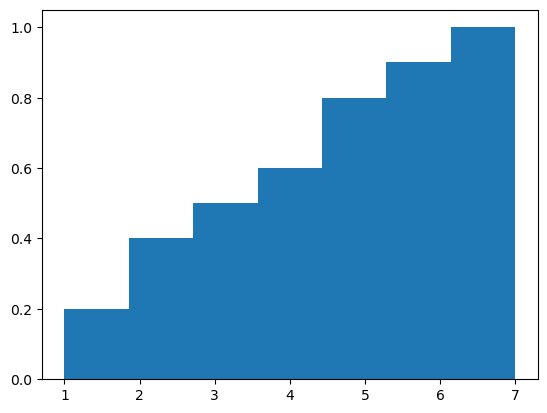

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_cdf(batsman_score: np.array):
    ''' use matplotlib hist  to get cumulative density function (CDF)'''
    cdf_list, b, p = plt.hist(batsman_score, bins = int(max(batsman_score)+1-min(batsman_score)), density=True, cumulative=True)
    # print(f' using plt.hist pmc {cdf_list}')

    return cdf_list


def get_cdf_v2(batsman_score: np.array):
    ''' use np histogram to get pdf data and then seperately use cumsum to get cumulative density function (CDF)'''
    cdf_list, b = np.histogram(batsman_score, bins = int(max(batsman_score)+1-min(batsman_score)), density=True)
    cum_sum = np.cumsum(cdf_list)
    # print(f' using plt.hist pmc {cdf_list}')

    return cum_sum

# trial run for small data
data1 = np.array([1,2,3,1,2,4,5,6,5,7])

print(' cdf ',get_cdf(data1))
print(' cdf v2',get_cdf_v2(data1));

 cdf  [0.2 0.4 0.5 0.6 0.8 0.9 1. ]
Bin width: 0.8571428571428572
 cdf v3 [0.2 0.4 0.5 0.6 0.8 0.9 1. ]


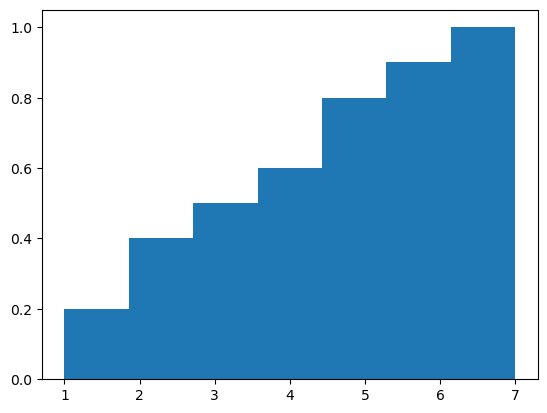

In [6]:
def get_cdf_v3(batsman_score: np.array):
    ''' use np histogram to get pdf data and then seperately use cumsum to get cumulative density function (CDF)'''
    cdf_list, b = np.histogram(batsman_score, bins = int(max(batsman_score)+1-min(batsman_score)), density=True)
    # print(cdf_list)
    # print(f"bins boundaries {b}")
    bin_widths = np.diff(b)
    print("Bin width:", bin_widths[0])
    # val1 = b[0]
    # for i in range(1,len(b)):
        # print(f" diff {i} = {b[i]-val1}")
        # val1 = b[i]
    cum_sum = np.cumsum(cdf_list * bin_widths[0])
    # print(f' using plt.hist pmc {cdf_list}')

    return cum_sum

# trial run for small data
# data1 = np.array([1,2,3,1,2,4,5,6,5,7])

print(' cdf ',get_cdf(data1))
# print(' cdf v2',get_cdf_v2(data1));
print(' cdf v3',get_cdf_v3(data1));
